#Organizando as bases e aplicando a correlação


In [ ]:
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import LabelEncoder

# Carregando as bases de dados
image = pd.read_csv('/content/Image.csv')
made = pd.read_csv('/content/Madelon.csv')
wave = pd.read_csv('/content/Waveform.csv')

# Imagem.csv tem classe em string, vamos fazer ser algo numerico
label_encoder = LabelEncoder()
image['classe'] = label_encoder.fit_transform(image['classe'])

# Calculando a correlacoe de pearson
image_corr = image.corr()
made_corr = made.corr()
wave_corr = wave.corr()

display(image_corr)
display(made_corr)
display(wave_corr)

#Gerar o mapa de calor

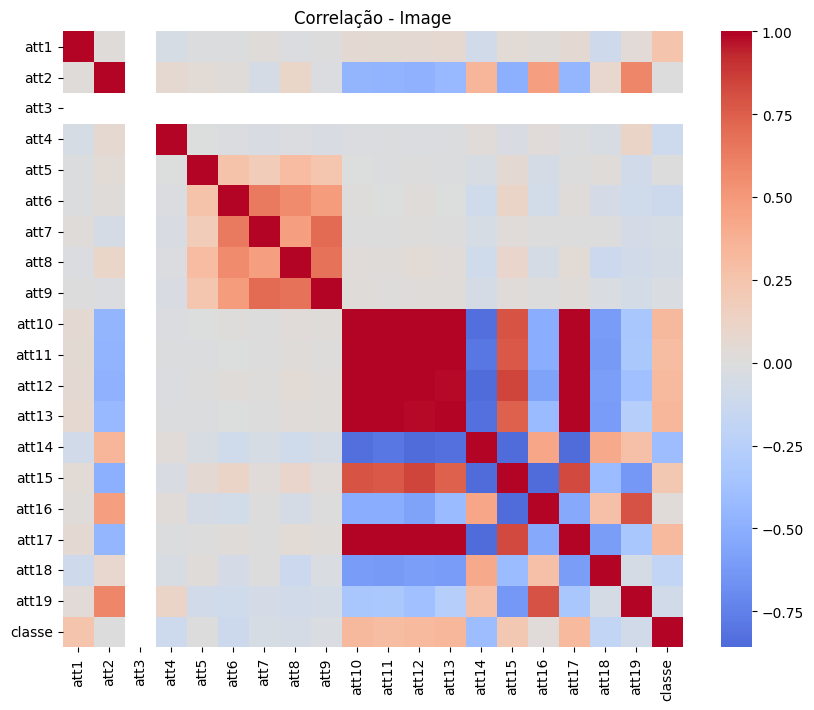

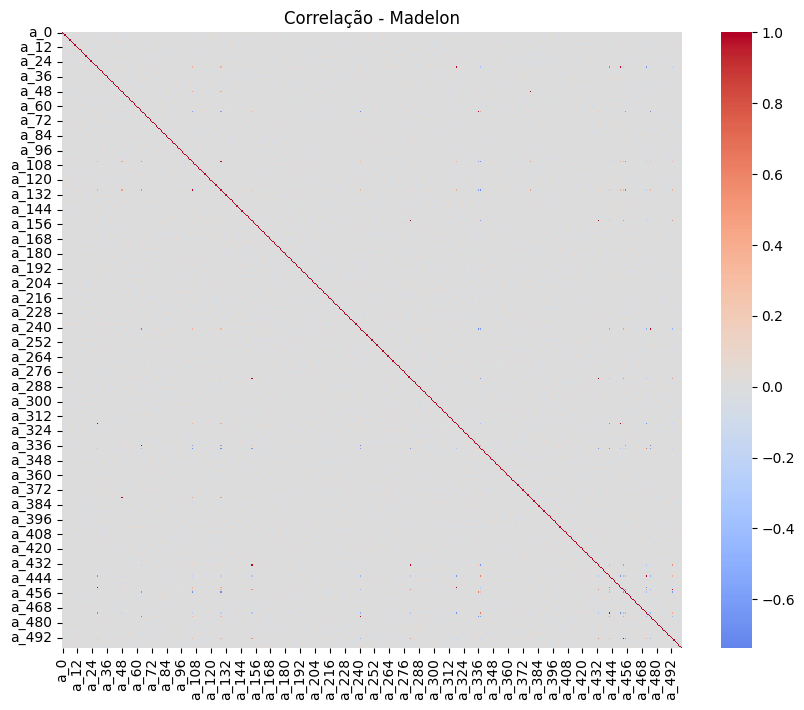

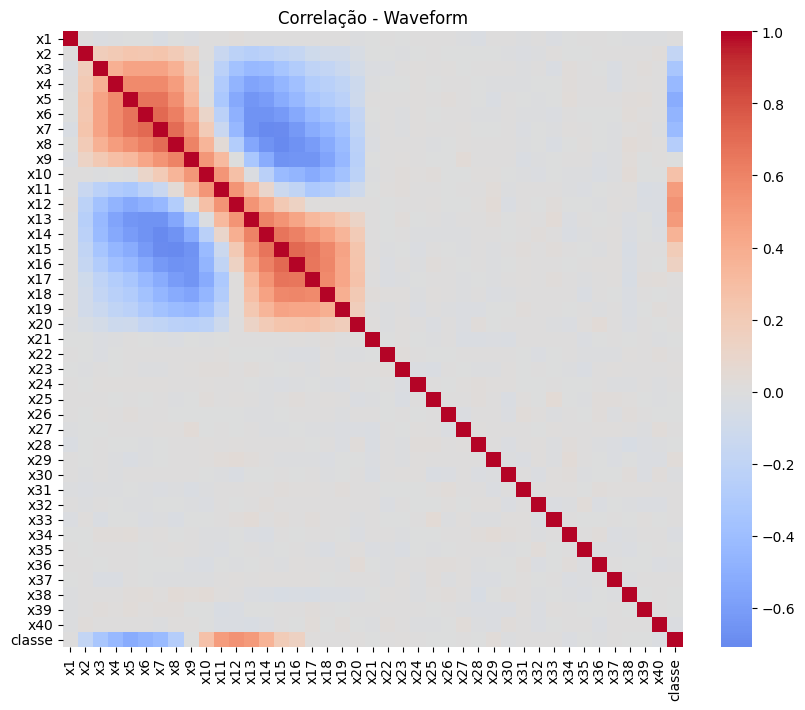

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(corr_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
    plt.title(title)
    plt.show()

plot_heatmap(image_corr, "Correlação - Image")
plot_heatmap(made_corr, "Correlação - Madelon")
plot_heatmap(wave_corr, "Correlação - Waveform")


#Escolhendo os 10 menores correlacionados

In [ ]:
# Remover a coluna de classe para a analise de atributos
image_atributos = image.drop('classe', axis=1)
made_atributos = made.drop('classe', axis=1)
wave_atributos = wave.drop('classe', axis=1)

# Calculo da matriz de correlação sem atributo classe
corr_image = image_atributos.corr().abs()
corr_made = made_atributos.corr().abs()
corr_wave = wave_atributos.corr().abs()

# Media das correlaçoes de cada atributo
media_image = corr_image.mean()
media_made  = corr_made.mean()
media_wave = corr_wave.mean()

# Selecionar os 10 atributos menos correlacionados
col_reduzido_image = media_image.nsmallest(10).index
col_reduzido_made = media_made.nsmallest(10).index
col_reduzido_wave = media_wave.nsmallest(10).index

# Nova base reduzida
image_reduzido = image[col_reduzido_image.to_list() + ['classe']]
made_reduzido = made[col_reduzido_made.to_list() + ['classe']]
wave_reduzido = wave[col_reduzido_wave.to_list() + ['classe']]

display(image_reduzido)
display(made_reduzido)
display(wave_reduzido)

# Salver o resultado
image_reduzido.to_csv('image_corr.csv', index=False)
made_reduzido.to_csv('madelon_corr.csv', index=False)
wave_reduzido.to_csv('waveform_corr.csv', index=False)



,att4,att1,att5,att7,att9,att6,att8,att19,att2,att18,classe
0,0.000000,140,0.0,0.062963,0.311111,0.277778,0.666667,-1.121818,125,0.545635,0
1,0.000000,188,0.0,0.266667,0.077778,0.333333,0.500000,-0.924817,133,0.538580,0
2,0.000000,105,0.0,0.107407,0.522222,0.277778,0.833333,-0.965946,139,0.532628,0
3,0.000000,34,0.0,0.166667,0.474074,0.500000,1.111111,-0.744272,137,0.573633,0
4,0.000000,39,0.0,0.374074,0.429629,0.722222,0.888889,-1.175773,111,0.562919,0
...,...,...,...,...,...,...,...,...,...,...,...
2305,0.000000,32,0.0,0.862963,0.611111,0.944445,0.833333,-1.982834,158,0.520578,1
2306,0.111111,8,0.0,2.062962,0.133333,1.611111,0.333333,-2.044946,162,0.484805,1
2307,0.000000,128,0.0,0.251852,0.162963,0.555555,0.777778,-1.996307,161,0.540918,1
2308,0.000000,150,0.0,1.633334,0.418518,2.166667,1.388889,-1.943449,158,0.503086,1


,a_75,a_205,a_67,a_388,a_197,a_103,a_276,a_150,a_20,a_155,classe
0,480,476,481,494,475,462,476,501,515,482,-1
1,416,477,463,492,491,476,475,538,478,519,-1
2,534,477,485,457,487,483,477,500,492,489,1
3,482,478,489,507,485,480,476,480,455,500,1
4,461,478,481,483,482,480,477,494,485,410,1
...,...,...,...,...,...,...,...,...,...,...,...
2595,526,475,473,475,496,467,476,454,474,503,1
2596,562,477,484,509,484,493,477,486,500,507,1
2597,565,478,506,482,494,474,476,489,477,499,1
2598,483,477,520,484,493,486,477,483,475,492,1


,x1,x22,x26,x35,x24,x21,x32,x23,x27,x36,classe
0,-0.23,0.09,1.11,0.34,-0.23,1.01,-0.86,1.22,0.02,-0.13,2
1,-0.69,2.14,0.20,0.28,1.21,-1.42,0.29,0.57,0.07,2.17,1
2,0.40,1.21,0.12,-0.99,0.57,-0.47,0.43,1.12,0.10,-0.75,0
3,0.59,-0.50,-0.62,0.19,-0.42,-0.19,1.23,-1.22,0.34,-1.04,1
4,-0.15,0.28,-2.05,-0.35,1.23,-0.18,0.25,-0.61,0.14,0.44,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.16,0.25,0.15,1.68,-0.79,-0.50,1.83,-1.24,-0.13,-1.23,1
4996,0.81,1.25,-0.52,-0.29,-1.96,0.32,0.08,-1.62,-1.65,-0.55,0
4997,-0.61,-2.50,0.58,-0.66,0.76,1.06,0.26,-0.11,0.11,-0.85,2
4998,-0.52,-0.68,0.11,0.56,-0.82,1.49,1.42,0.41,-0.63,-0.48,2


#APLICANDO PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def aplicar_pca(df, n_componentes=None, variancia_minima=None):
    X = df.drop('classe', axis=1)
    y = df['classe']

    # Padronizar dados
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # PCA com numero fixo ou variancia mínima
    if n_componentes:
        pca = PCA(n_components=n_componentes)
    elif variancia_minima:
        pca = PCA(n_components=variancia_minima)

    X_pca = pca.fit_transform(X_scaled)

    # Montar novo df com componentes e as classes
    df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
    df_pca['classe'] = y.reset_index(drop=True)

    return df_pca


In [ ]:
# PCA com 10 componentes
image_pca10 = aplicar_pca(image, n_componentes=10)
made_pca10 = aplicar_pca(made, n_componentes=10)
wave_pca10 = aplicar_pca(wave, n_componentes=10)

# PCA mantendo 90% da variância
image_pca90 = aplicar_pca(image, variancia_minima=0.90)
made_pca90 = aplicar_pca(made, variancia_minima=0.90)
wave_pca90 = aplicar_pca(wave, variancia_minima=0.90)

# Salvando as bases de dados
image_pca10.to_csv('image_pca10.csv', index=False)
made_pca10.to_csv('madelon_pca10.csv', index=False)
wave_pca10.to_csv('waveform_pca10.csv', index=False)

image_pca90.to_csv('image_pca90.csv', index=False)
made_pca90.to_csv('madelon_pca90.csv', index=False)
wave_pca90.to_csv('waveform_pca90.csv', index=False)

